# Star cluster simulation with core collapse

The cluster starts as a [Plummer model](https://en.wikipedia.org/wiki/Plummer_model) which is spherically symmetric, with initially isotropic orbits and $N=10^5$ stars. The stars share the same mass $m$. The total mass is $M = Nm$. It was evolved up to $t=2 \times 10^4 t_d$ with $t_d=\sqrt{r_s^3/GM}$. The scale radius $r_s$ is a parameter of the model which is set to $1$. Moreover we set $G=M=1$. Hence $t_d=1$. As a consequence of these choices the initial scale density is also $\approx 1$, and so is the scale velocity.

The file is a csv with ';' as a separator. The first columns is time (in units of $t_d$; every row is a measurement taken every $0.2$ $t_d$), the second is $\rho_c$, the central density within a fixed radius, the third is $\sigma_c$, the standard deviation of velocity within the same radius, the fourth is $r_\mathrm{half}$ i.e. the radius containing half the total number of particles, the fifth is $r_{\mathrm{mean,}c}$ the average distance from the center of particles within this radius, and the sixth and last is $N_\mathrm{esc}$, the number of escapers. Escapers are stars that are unbound (energy > 0) and go far from the cluster, so they would essentially move in uniform rectilinear motion forever and would just be a burden to keep track of. They are removed from the star cluster.

In the following I give you code to read the file and plot some columns as a sanity check.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cc = pd.read_csv('core_collapse_data.csv', sep = ';')
cc.head()

,time,rho_c,sigma_c,r_half,N_esc
0,0.01,0.324676,0.206907,1.273847,0
1,0.21,0.133690,0.198193,1.273847,0
2,0.41,0.229183,0.212280,1.273847,0
3,0.61,0.305577,0.265373,1.273847,0
4,0.81,0.343775,0.276828,1.273847,0


In [3]:
cc.describe()

,time,rho_c,sigma_c,r_half,N_esc
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,9999.910000,43.678593,0.322060,2.580439,7320.760210
std,5773.531559,34.429813,0.050671,1.248470,4511.474699
min,0.010000,0.076394,0.079117,1.208252,0.000000
25%,4999.960000,3.031902,0.289725,1.318540,2986.000000
50%,9999.910000,60.943611,0.331004,2.299209,7795.000000
75%,14999.860000,77.120119,0.364744,3.719175,11583.000000
max,19999.810000,89.897078,0.399282,4.941489,13846.000000


### Central density as a function of time
Let's plot the central density (mass per unit volume) within a fixed radius around the center of mass of the cluster. 

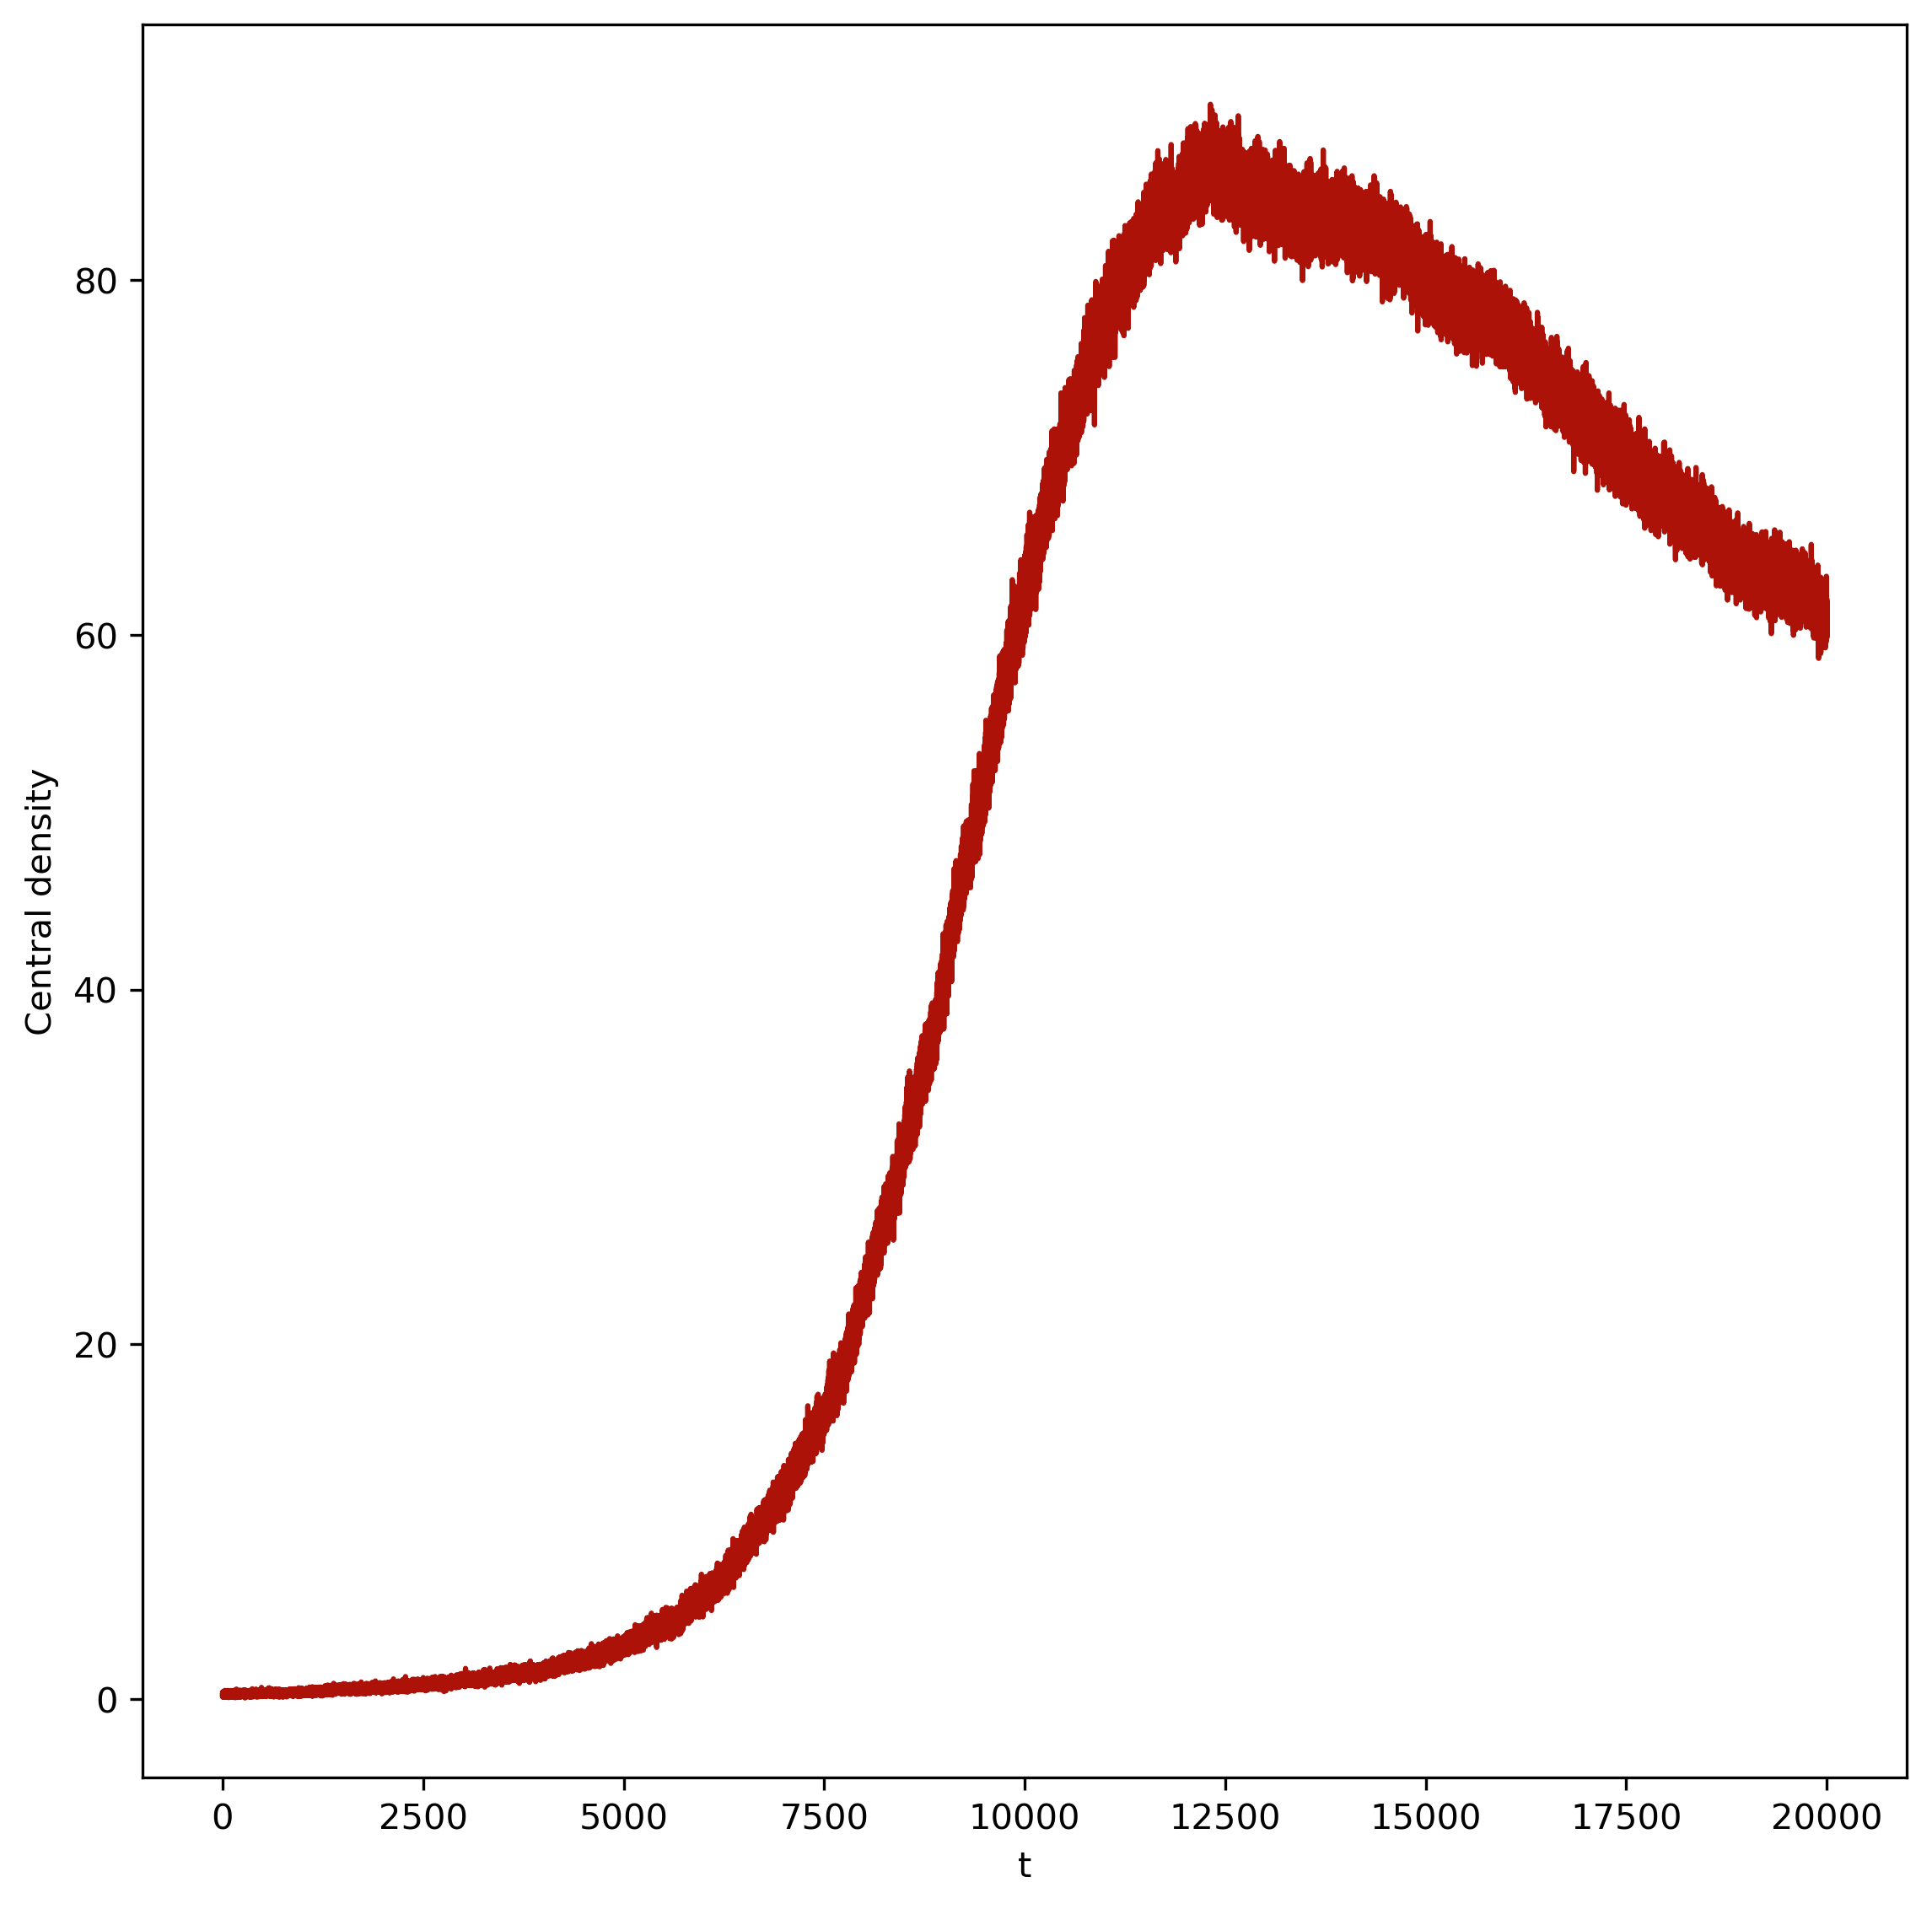

In [4]:
plt.figure(figsize=(9, 9), dpi=300)
plt.plot(cc['time'], cc['rho_c'], color = '#AC1208')
plt.xlabel('t')
plt.ylabel('Central density')
plt.show()

The density starts at $\approx 1$ ($0.32$ in fact) but climbs up to $\approx 80$, to decrease later on. The moment the maximum density is attained is the core-collapse.
Let's zoom in to see this better.

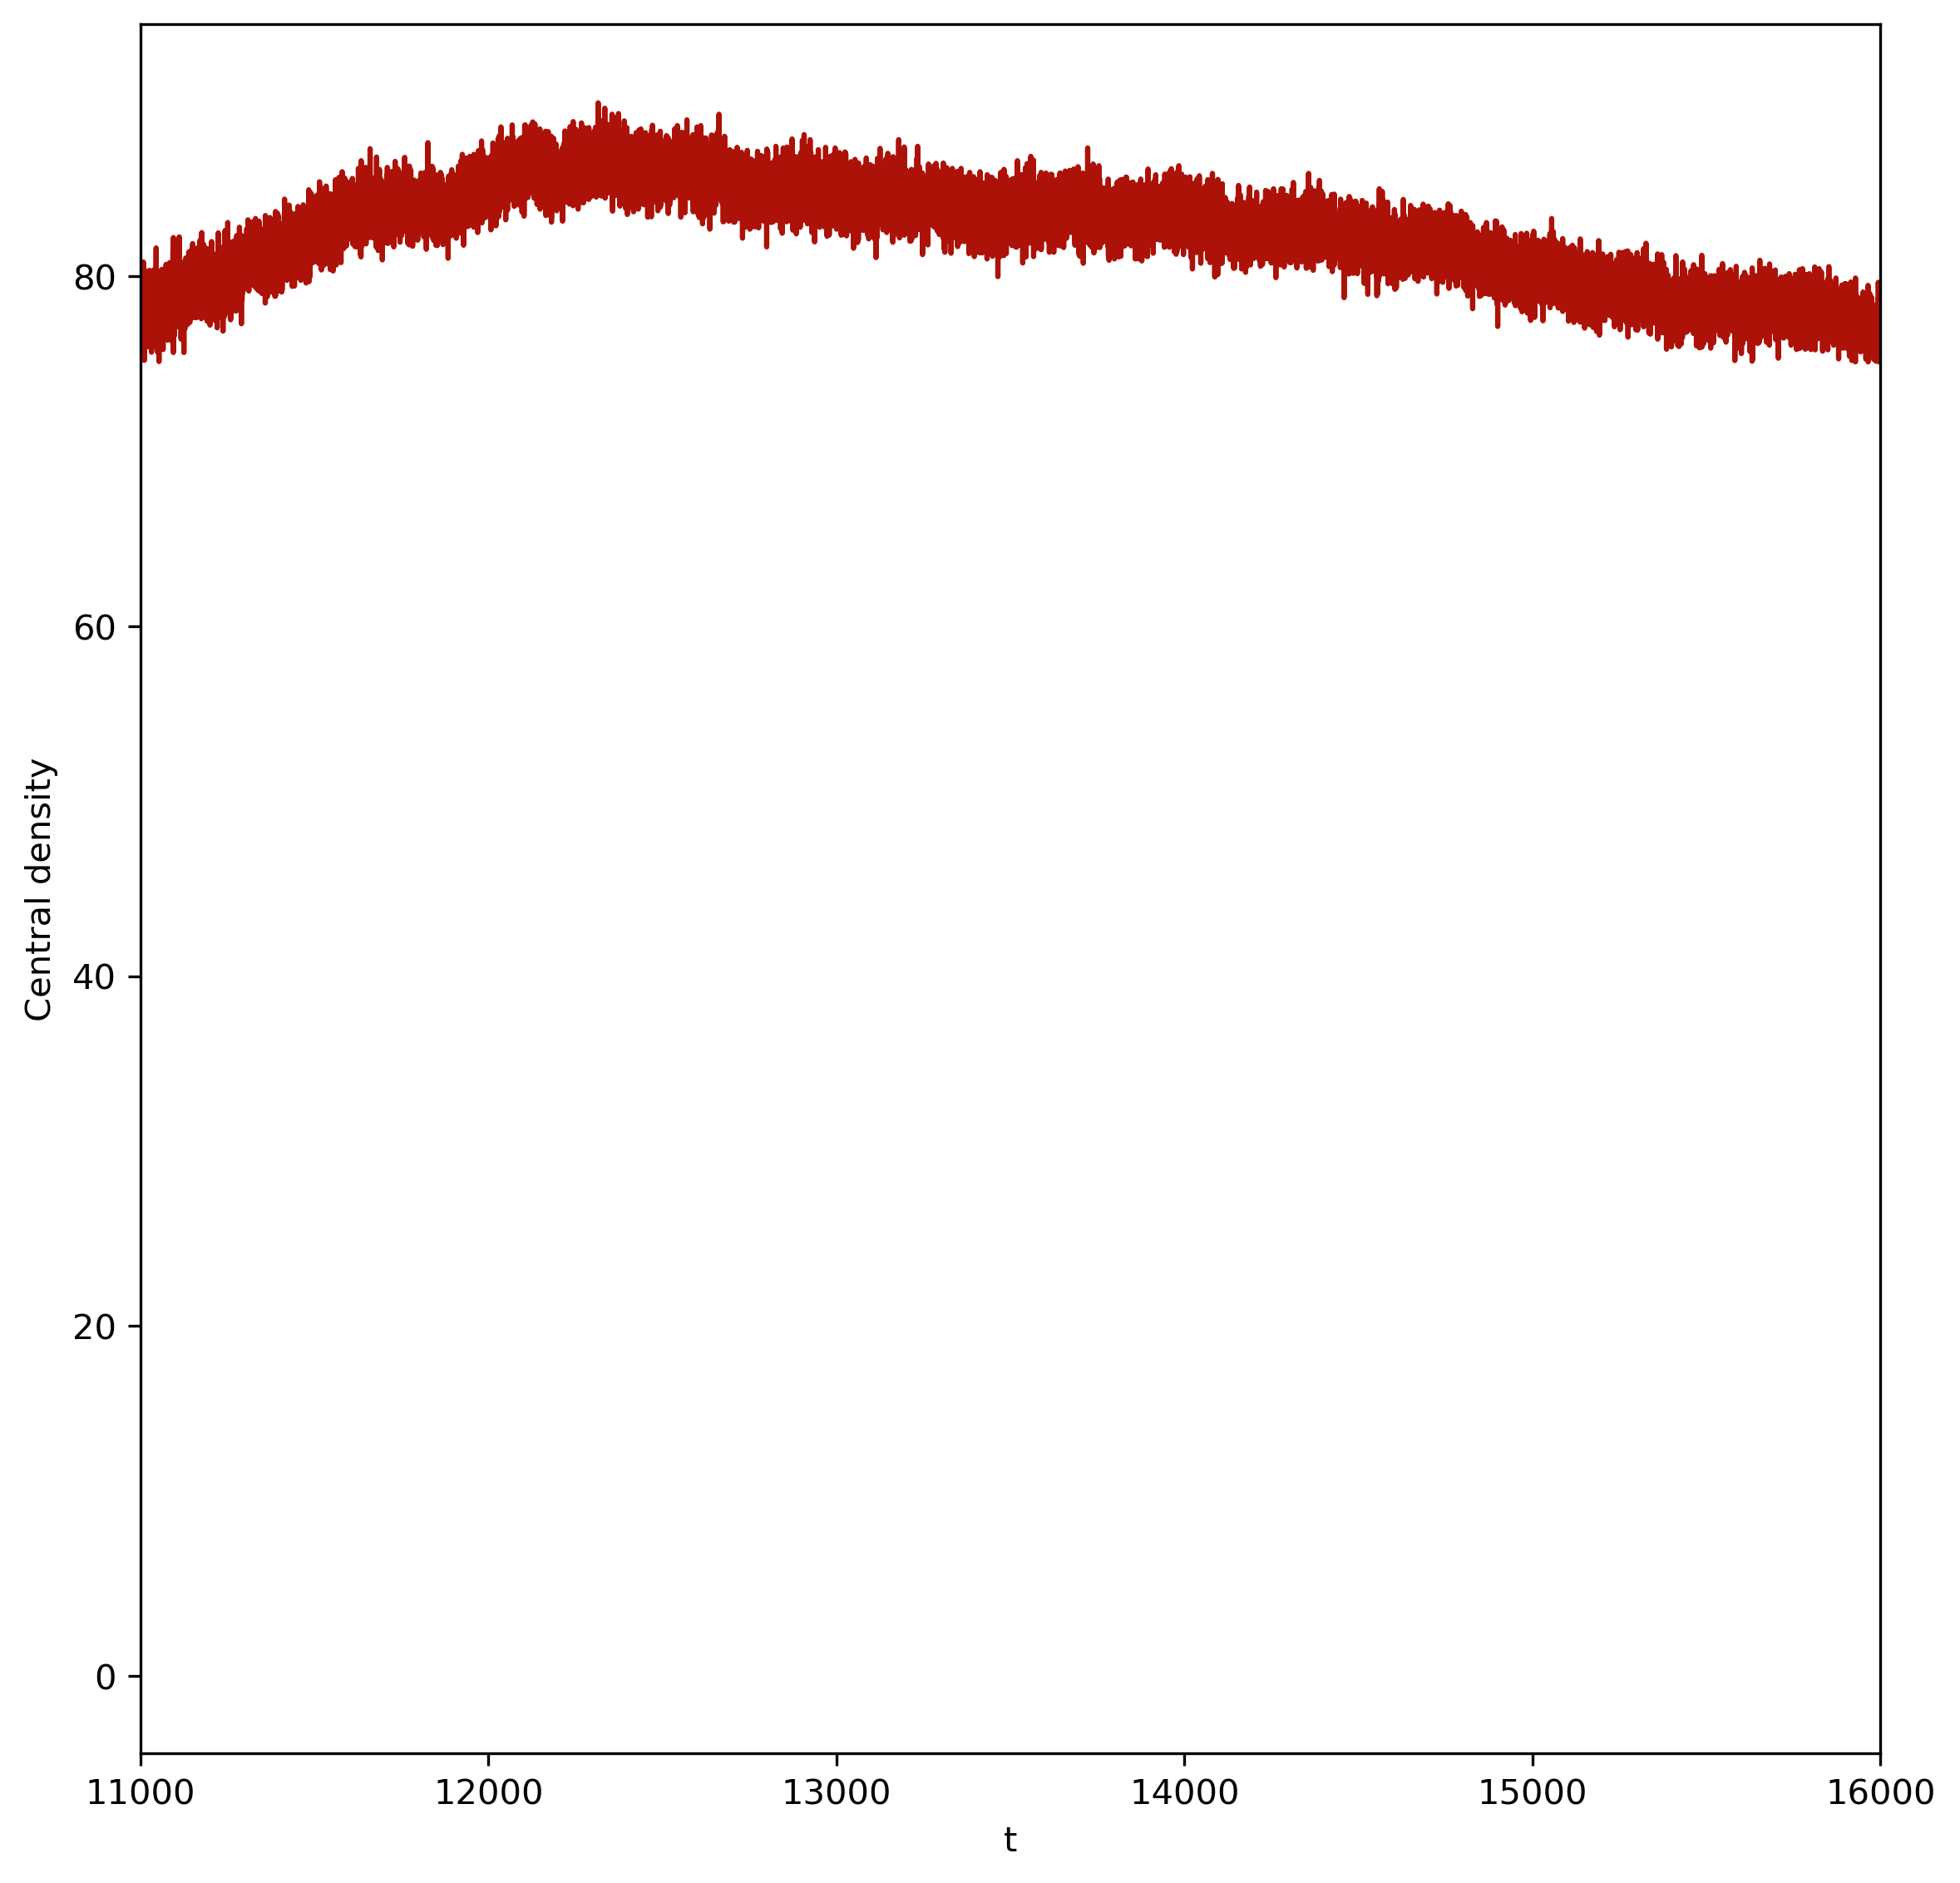

In [5]:
plt.figure(figsize=(9, 9), dpi=300)
plt.plot(cc['time'], cc['rho_c'], color = '#AC1208')
plt.xlabel('t')
plt.ylabel('Central density')
plt.xlim([11000, 16000])
plt.show()

Some more...

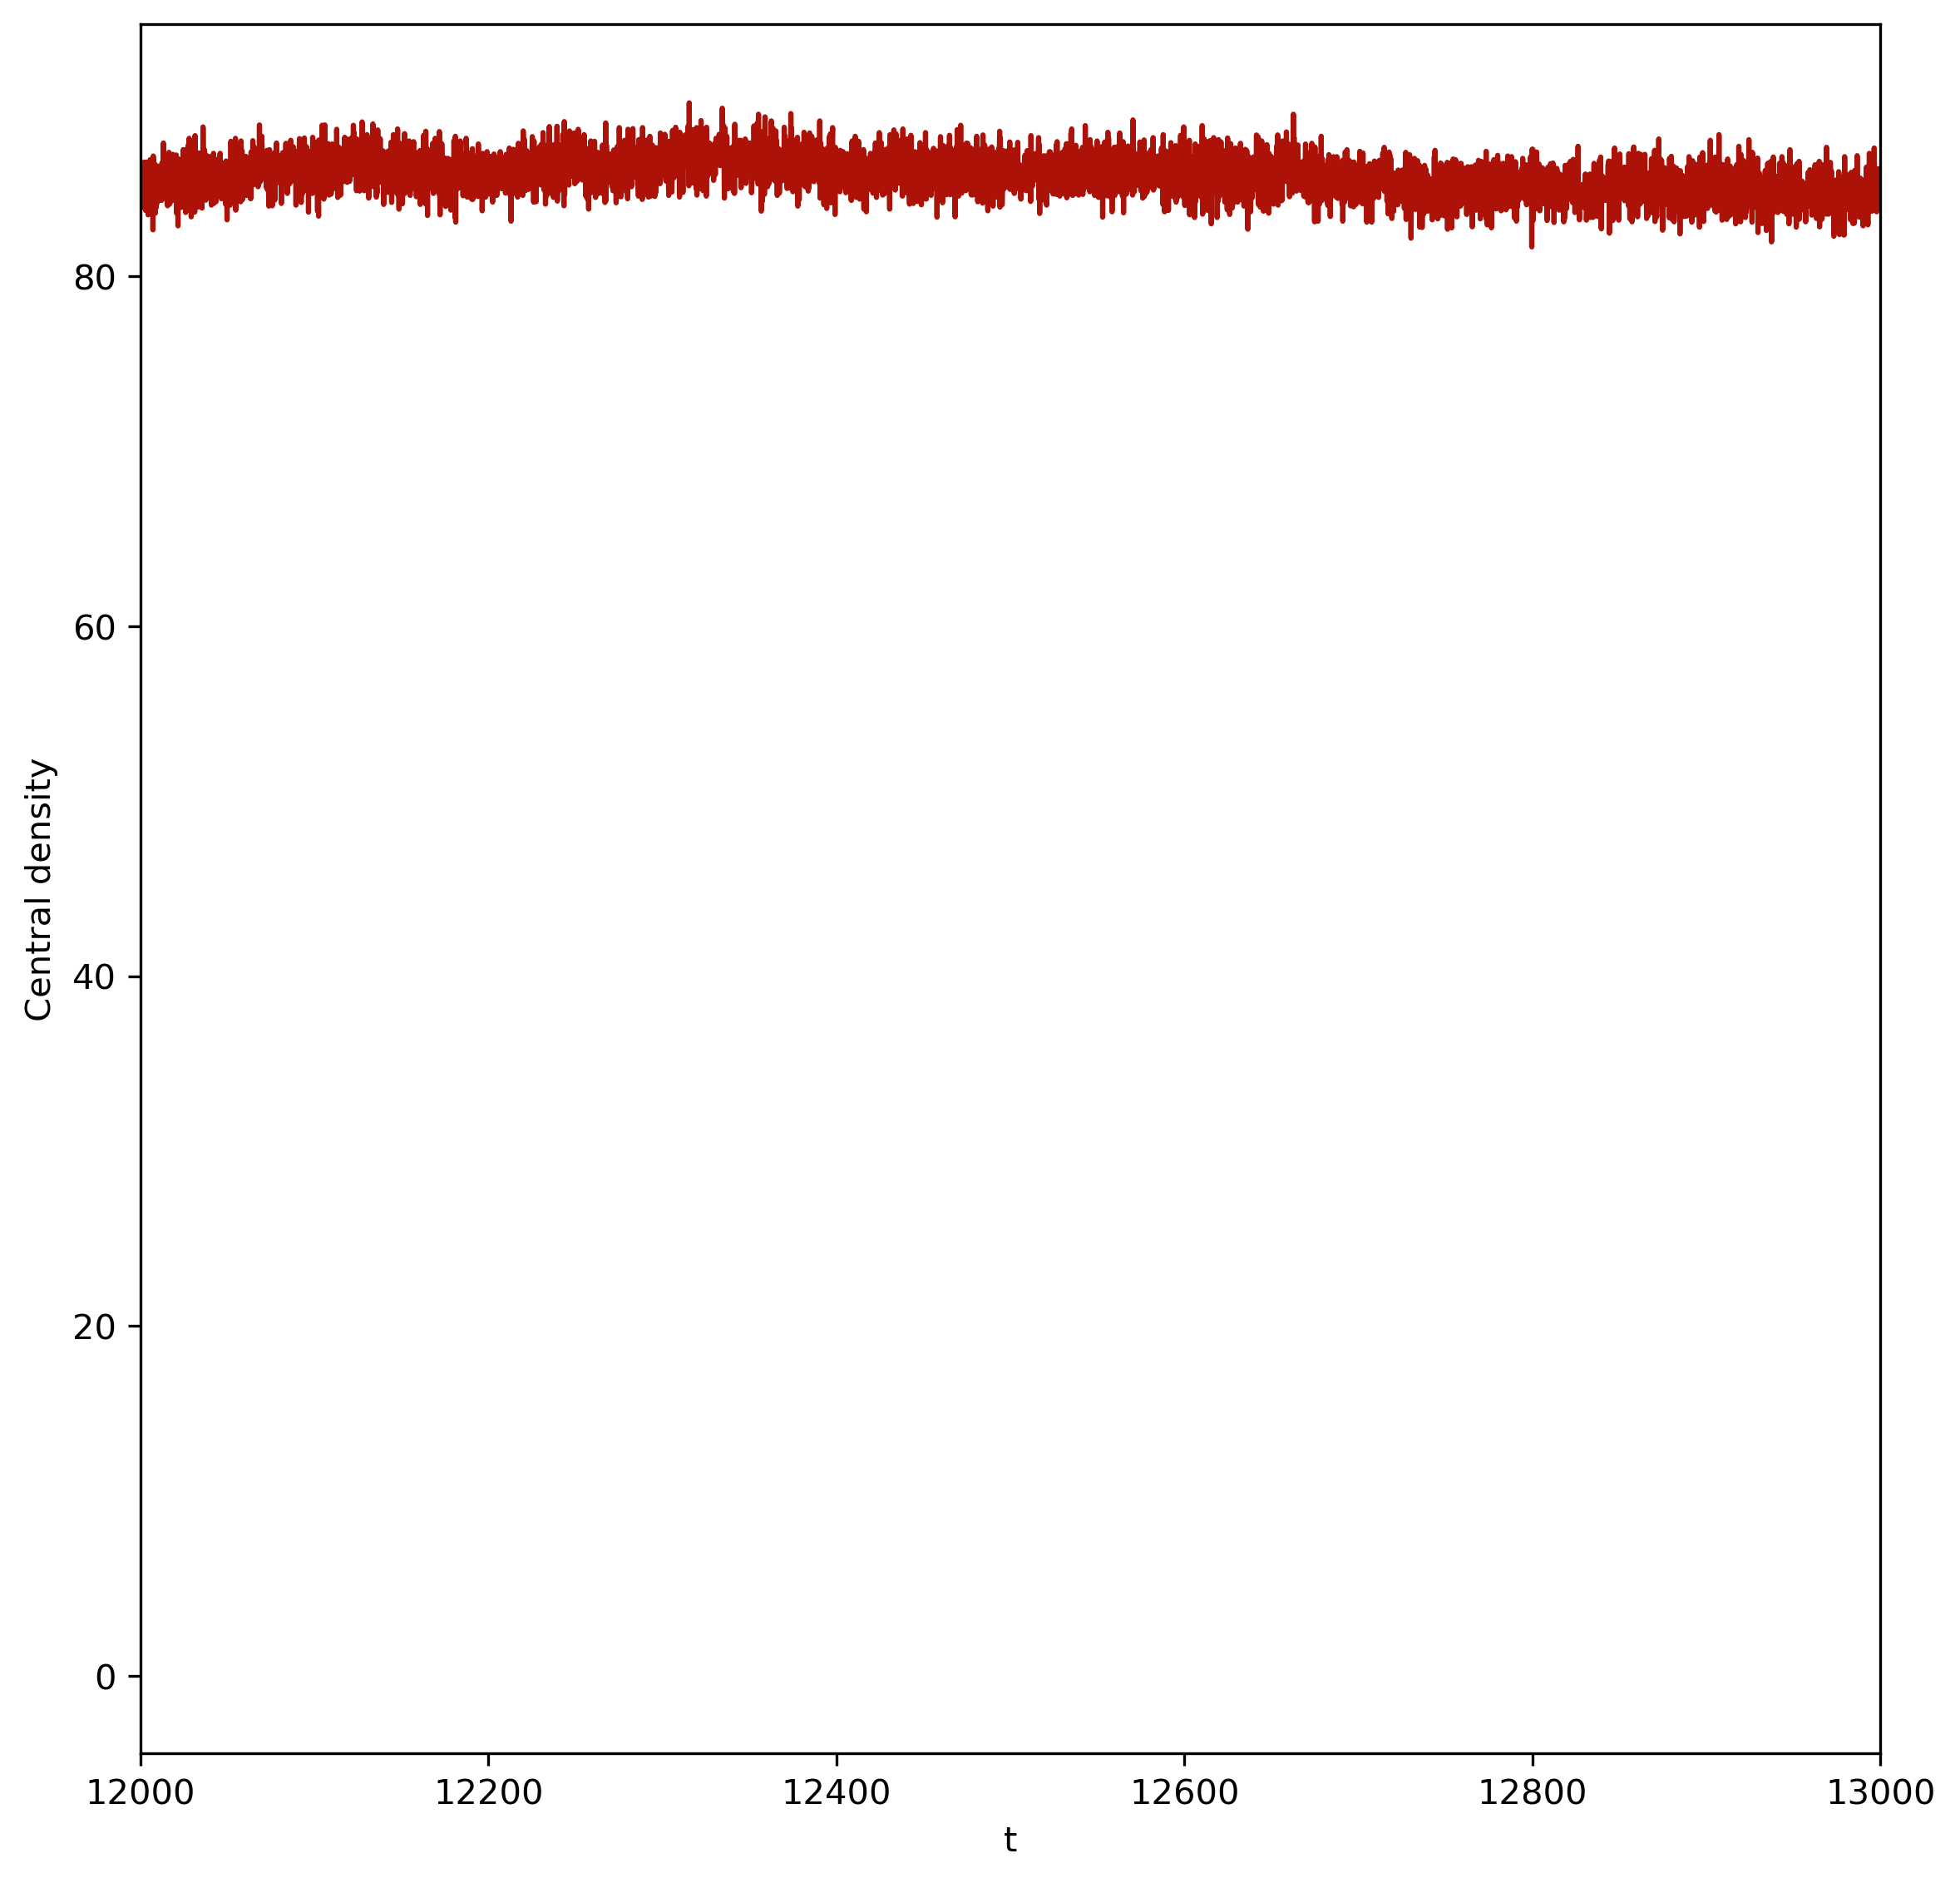

In [6]:
plt.figure(figsize=(9, 9), dpi=300)
plt.plot(cc['time'], cc['rho_c'], color = '#AC1208')
plt.xlabel('t')
plt.ylabel('Central density')
plt.xlim([12000, 13000])
plt.show()

Let's look at the time evolution of the central velocity dispersion, over the whole evolution at first

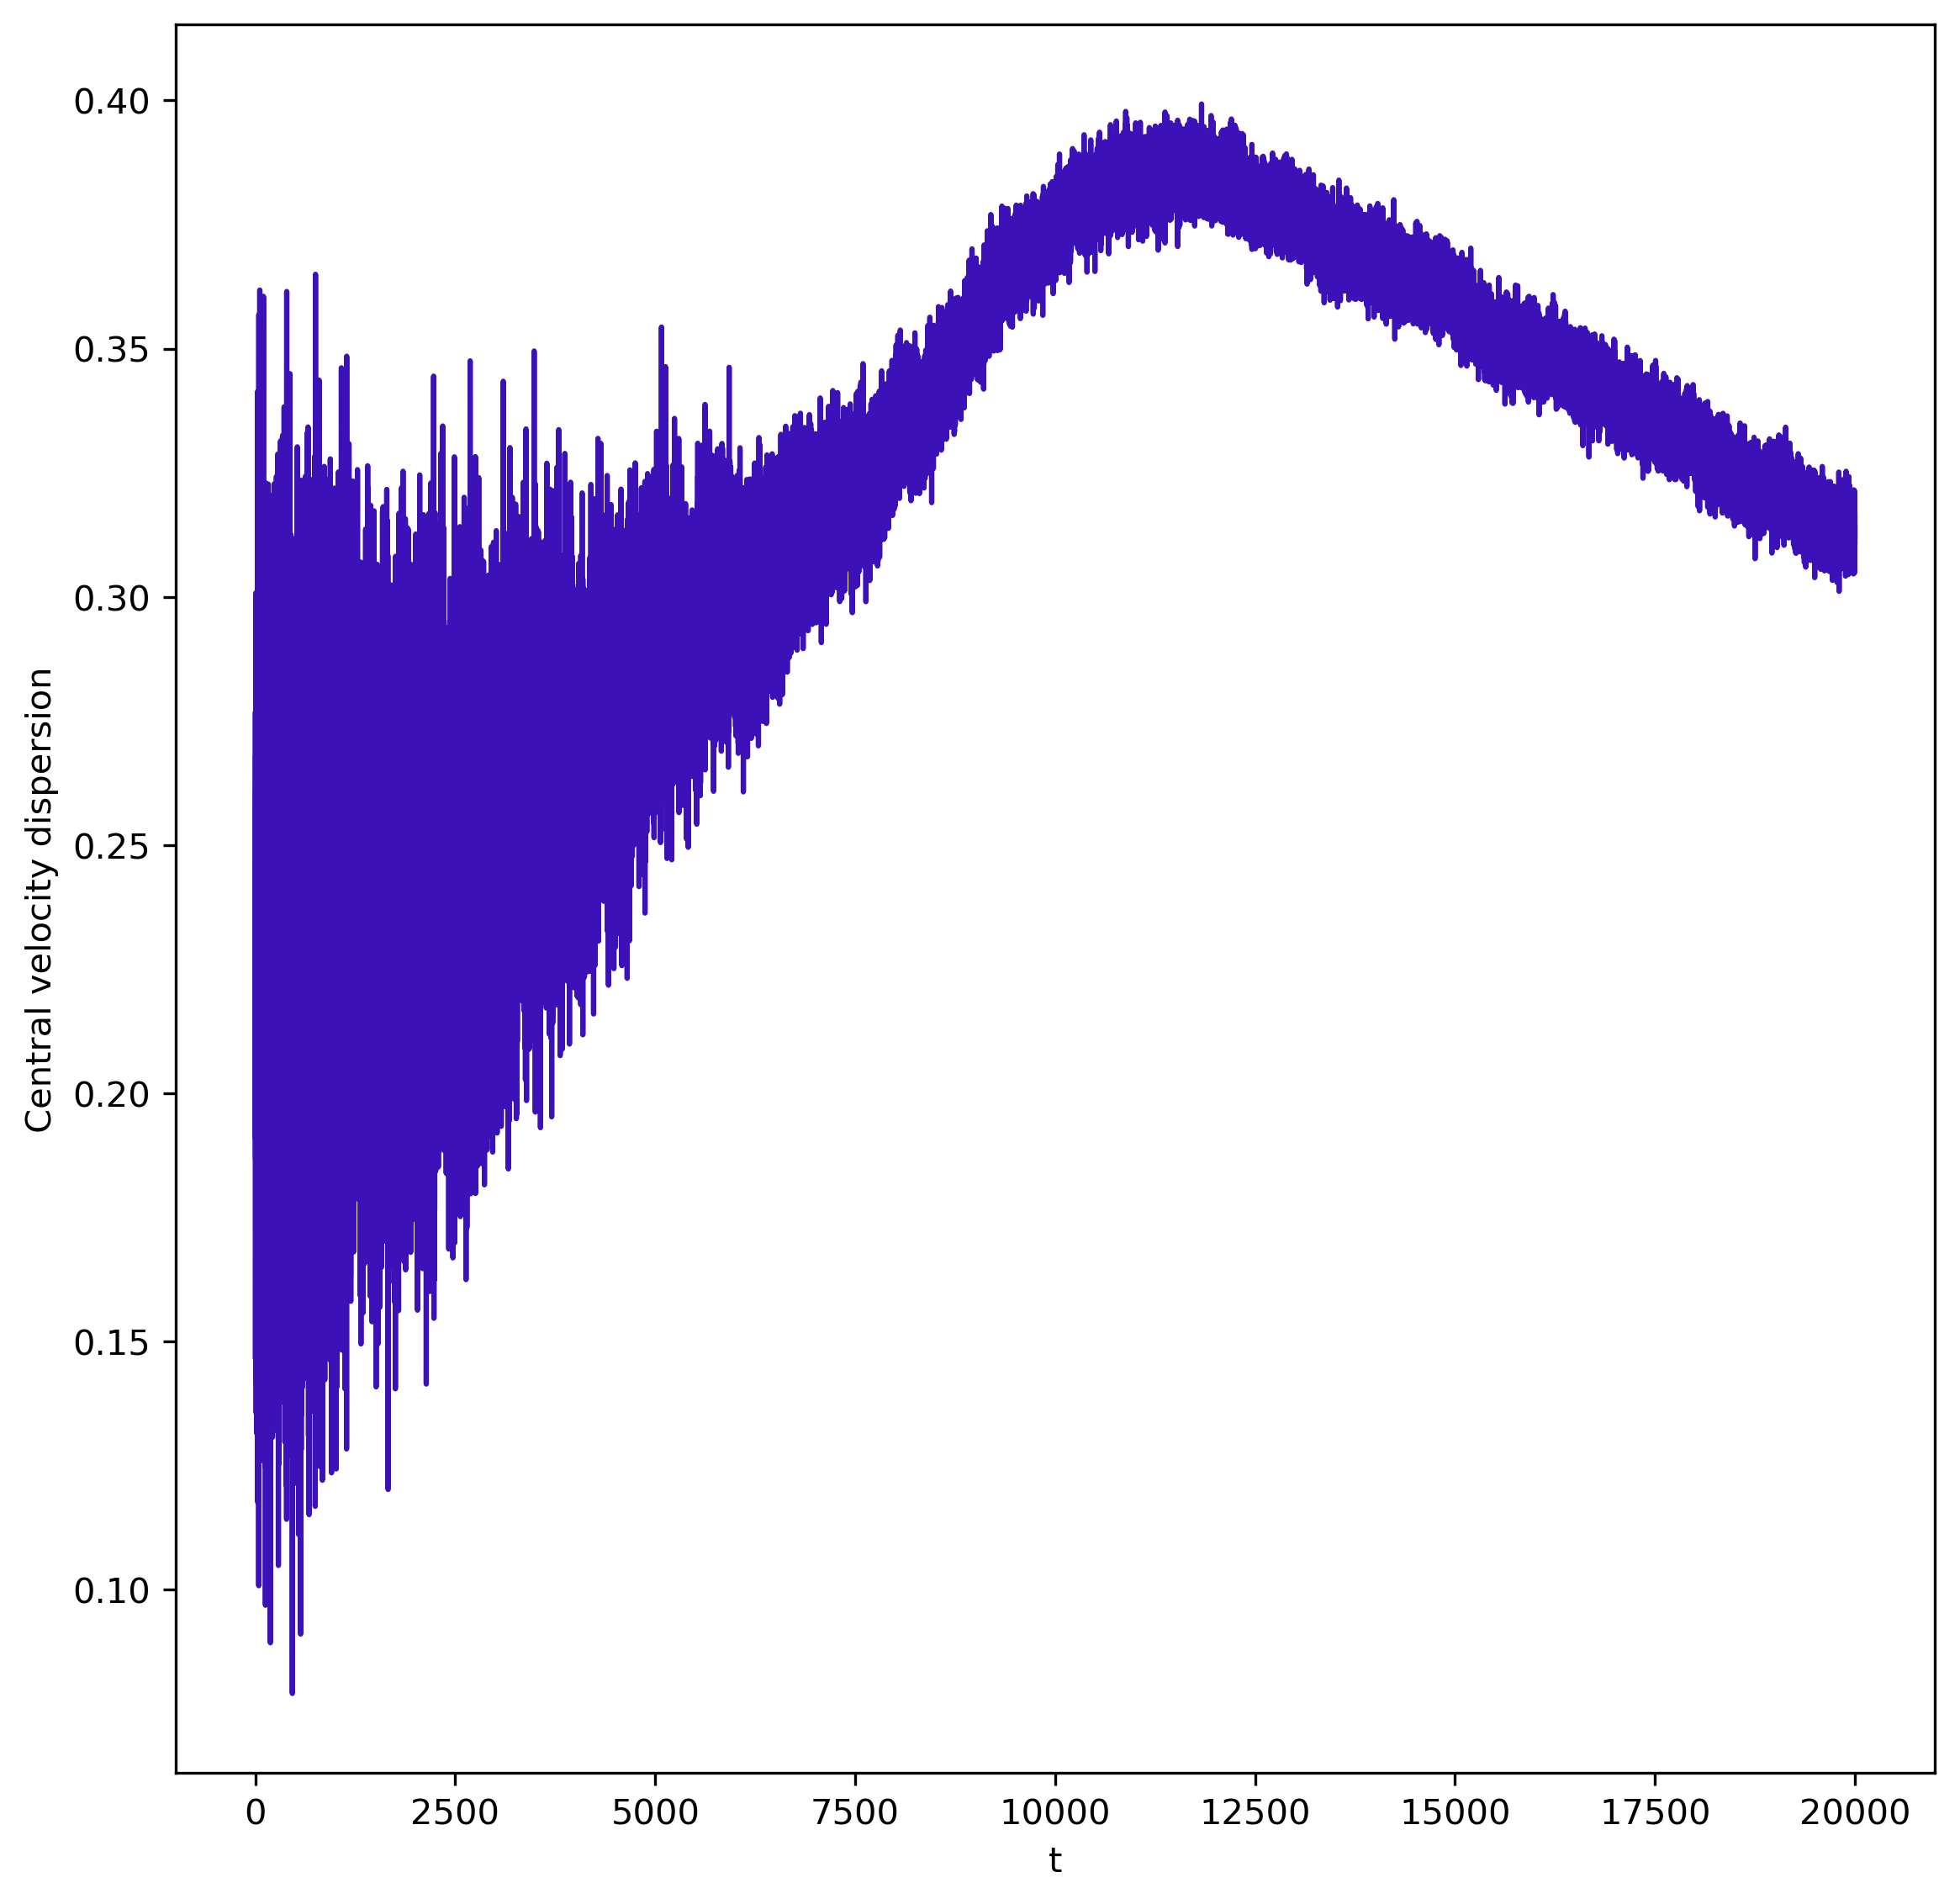

In [7]:
plt.figure(figsize=(9, 9), dpi=300)
plt.plot(cc['time'], cc['sigma_c'], color = '#3C12B8')
plt.xlabel('t')
plt.ylabel('Central velocity dispersion')
plt.show()

Then let's restrict the plot to the same time window around the core collapse

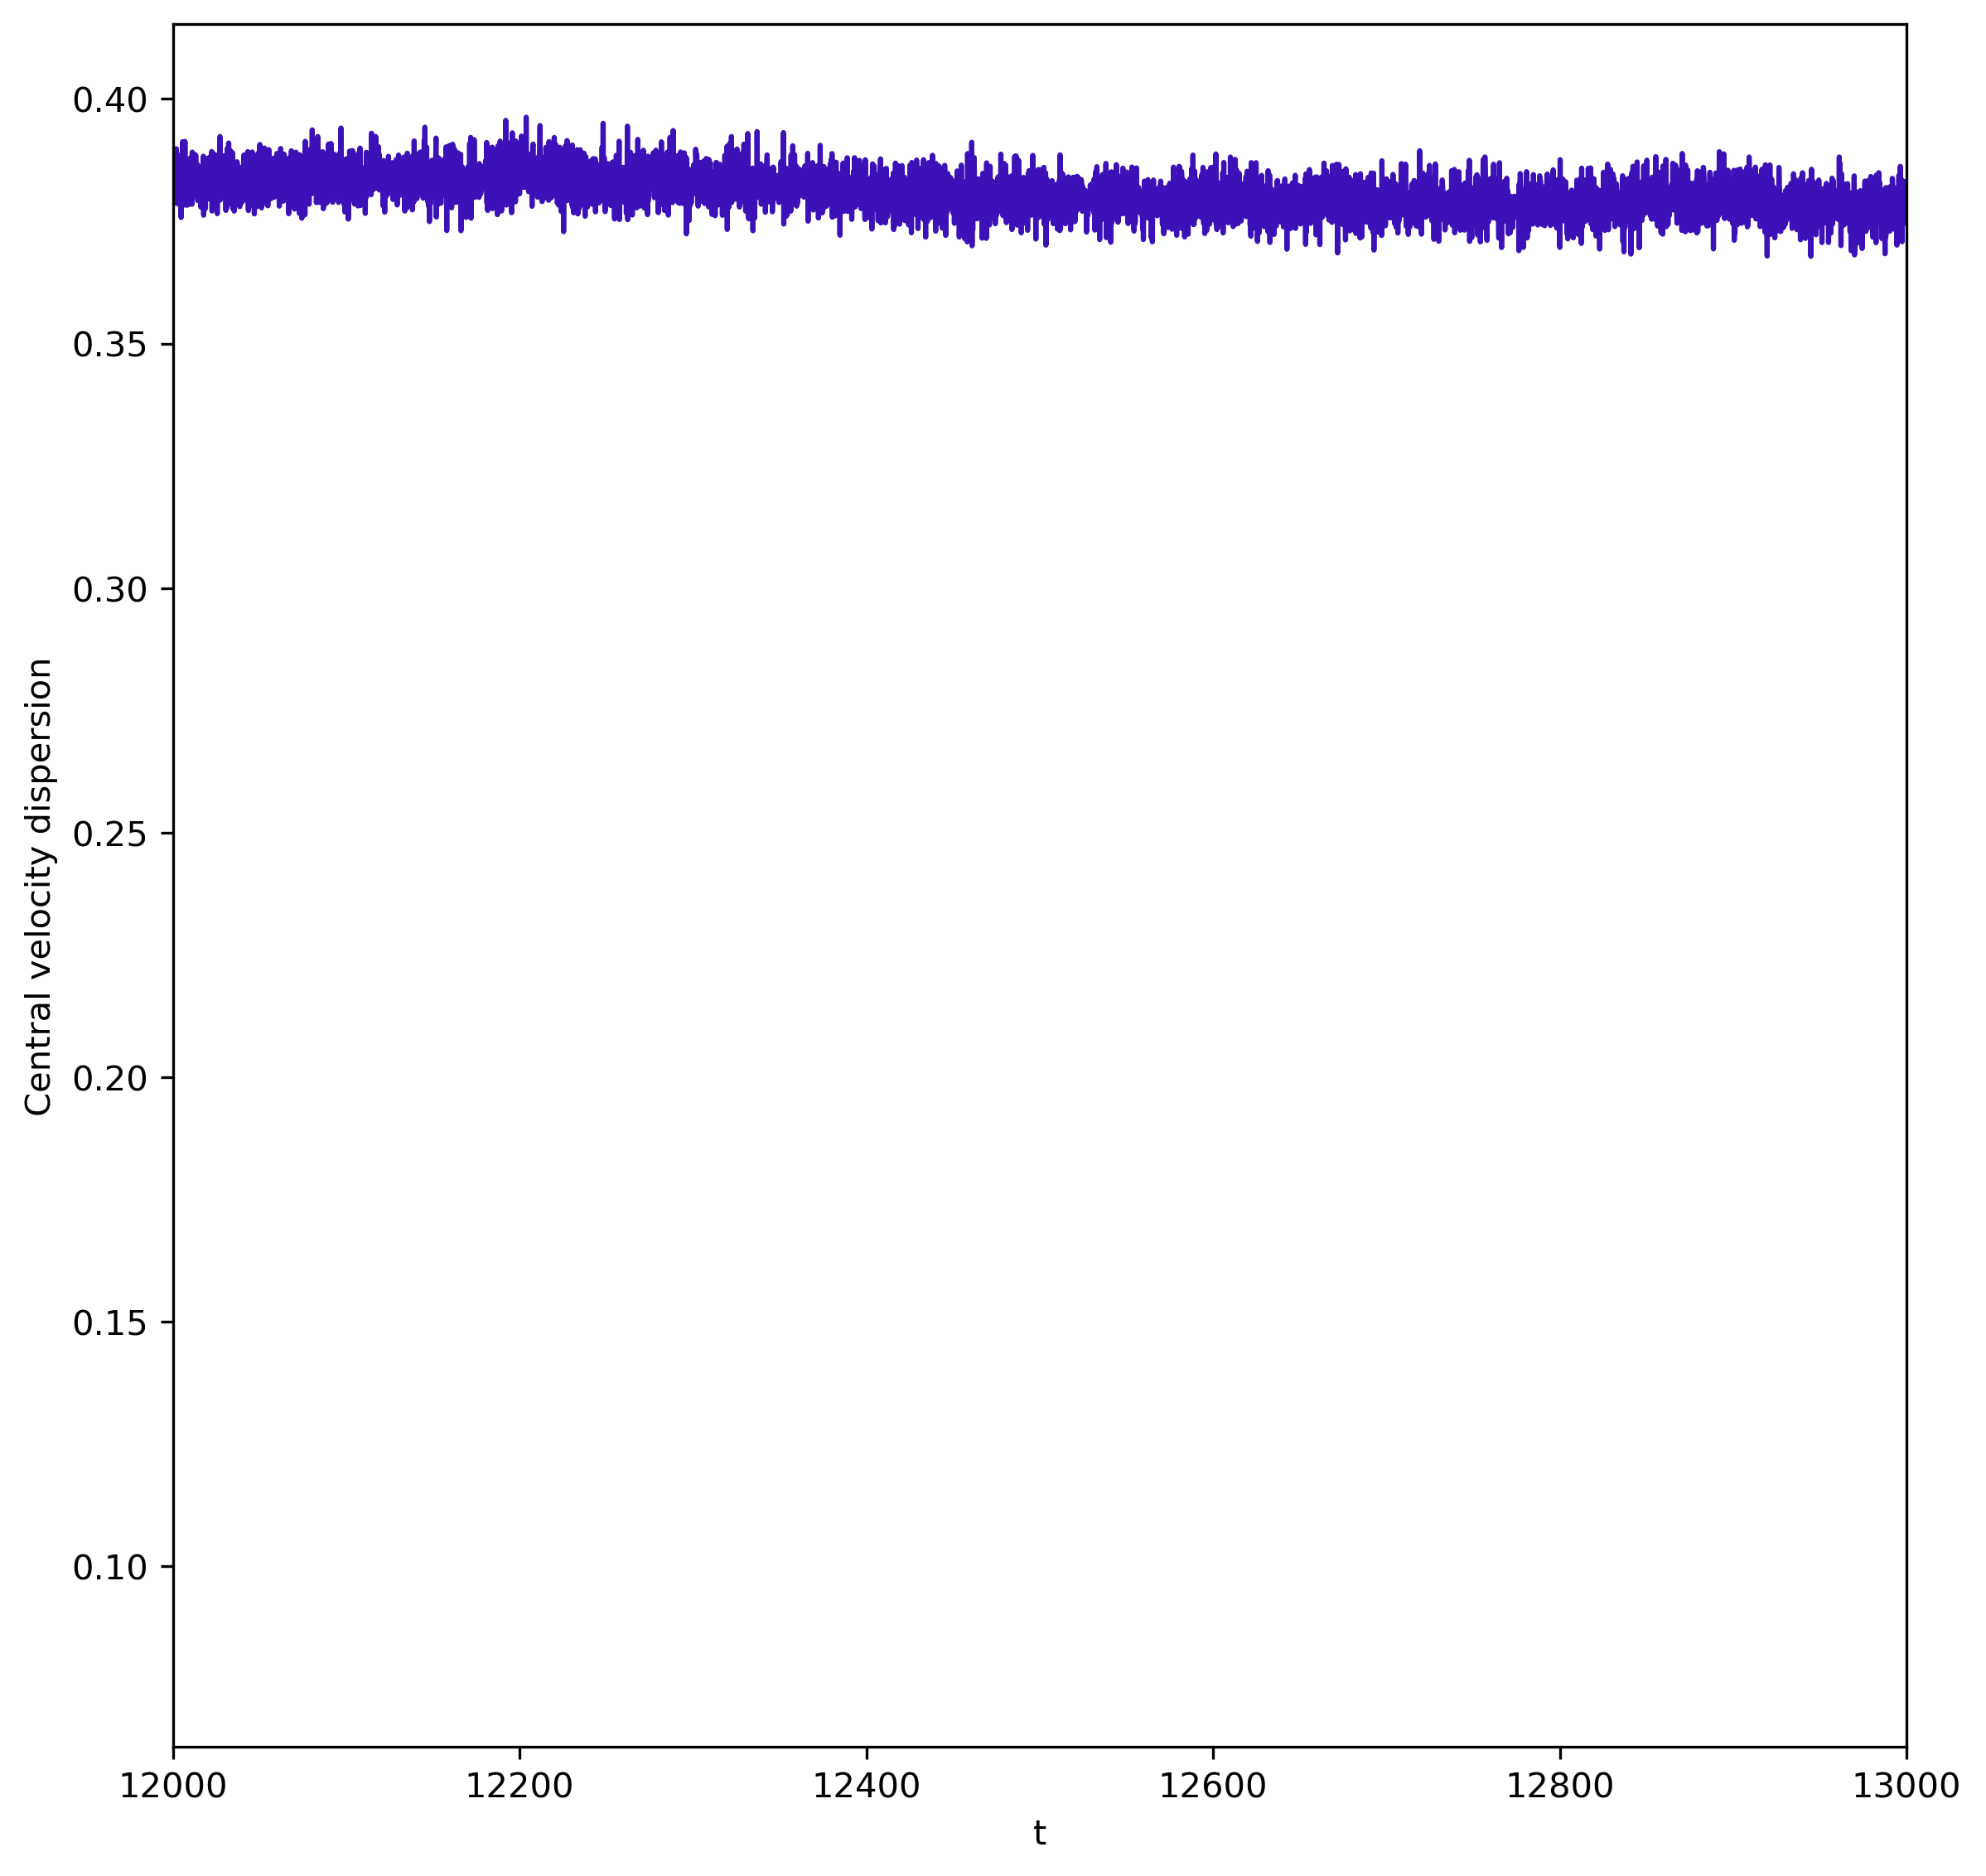

In [8]:
plt.figure(figsize=(9, 9), dpi=300)
plt.plot(cc['time'], cc['sigma_c'], color = '#3C12B8')
plt.xlabel('t')
plt.ylabel('Central velocity dispersion')
plt.xlim([12000, 13000])
plt.show()

Both the density and the velocity dispersion appear roughly constant, with some variation that looks like noise. It is really noise (the sum of many different uncorrelated effects) or is it fluctuations that arise from some underlying (low dimensional) dynamics? Hopefully we will find out.

Let's smooth by calculating a running mean over 10 dynamical times (50 time steps) and plot one against the other

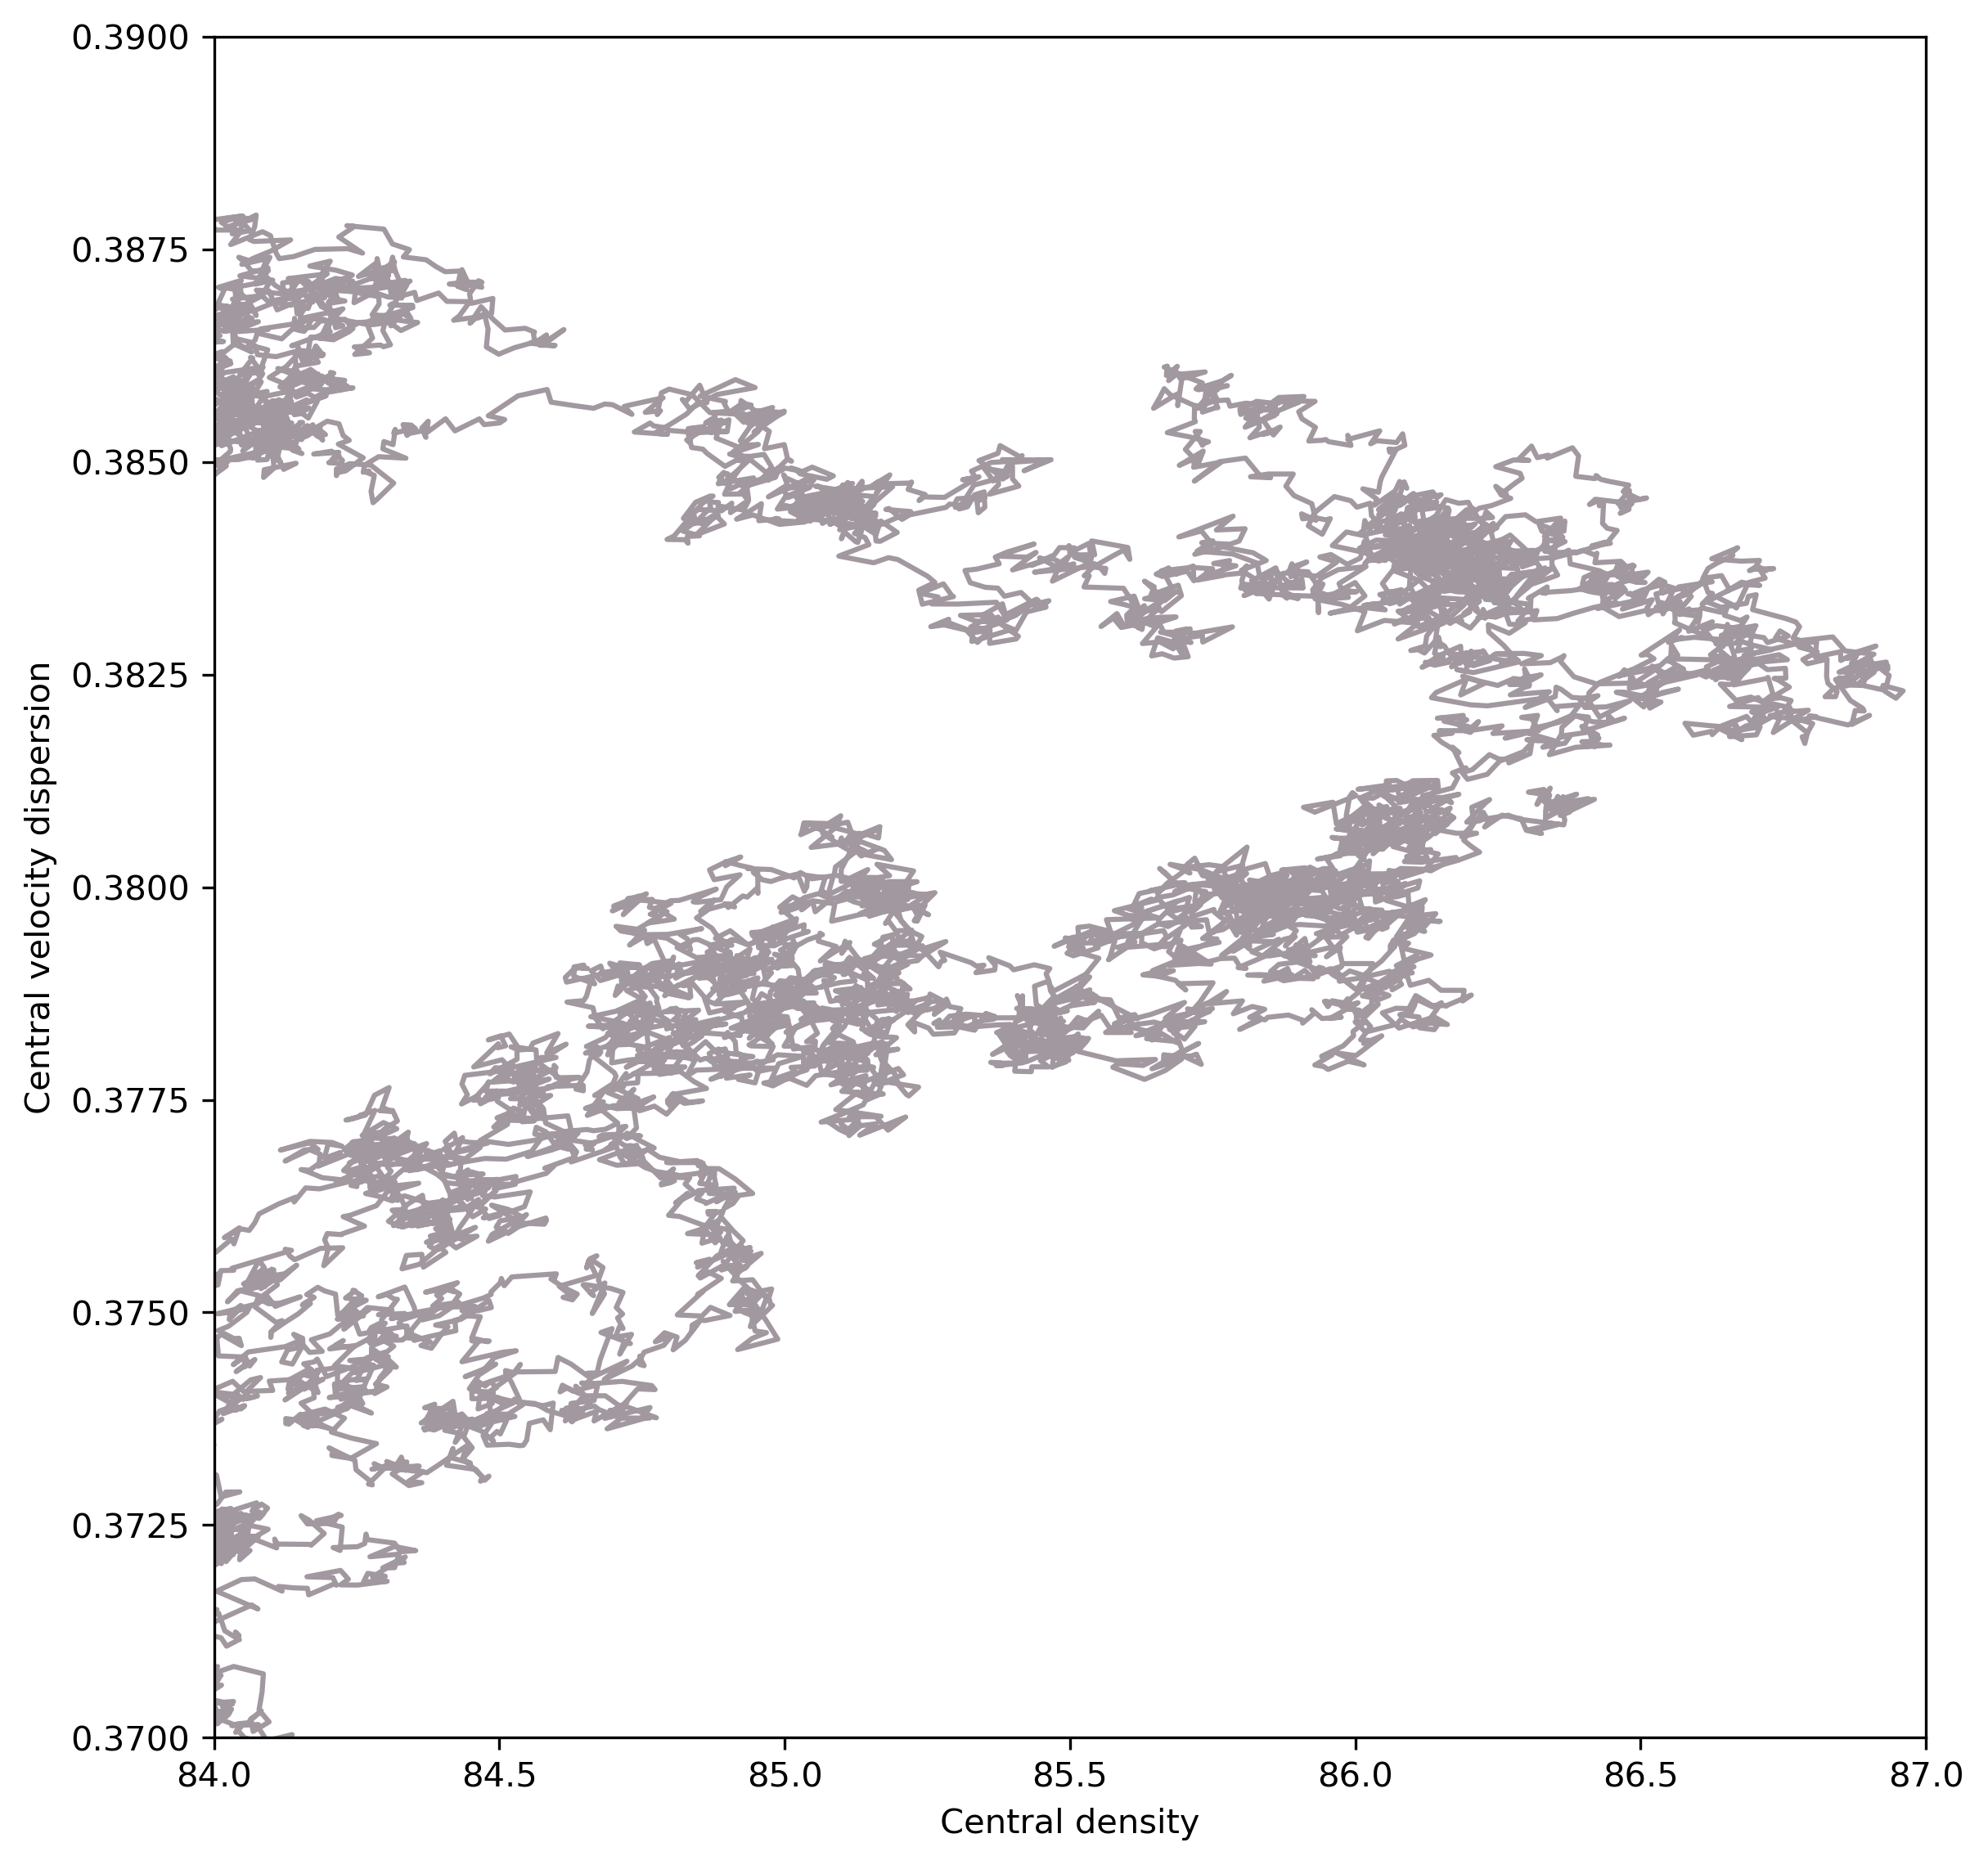

In [11]:
smooth_over_N = 50
running_mean_sigma = np.convolve(cc['sigma_c'], np.ones(smooth_over_N)/smooth_over_N, mode='valid')
running_mean_rho = np.convolve(cc['rho_c'], np.ones(smooth_over_N)/smooth_over_N, mode='valid')
plt.figure(figsize=(9, 9), dpi=300)
plt.plot(running_mean_rho, running_mean_sigma, color = '#A298A0')
plt.xlabel('Central density')
plt.ylabel('Central velocity dispersion')
plt.xlim([84.0, 87.0]) #change these to explore
plt.ylim([0.37, 0.39])
plt.show()

This definitely looks cool. But smoothing noise can produce all kinds of apparent structure, so we might be deceiving ourselves.

Example:

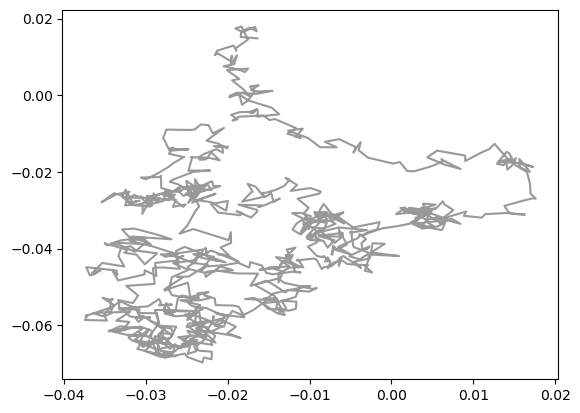

In [12]:
x = np.convolve(np.random.normal(size=2000), np.ones(1000)/1000, mode='valid')
y = np.convolve(np.random.normal(size=2000), np.ones(1000)/1000, mode='valid')

plt.plot(x,y, color = "#989998")
plt.show()

We can go back to the raw data and take a look at how much autocorrelation there is. We can plot our time series against itself, lagged by some amount, using pandas lag_plot. Or we can calculate the autocorrelation using plot_acf from statsmodels.

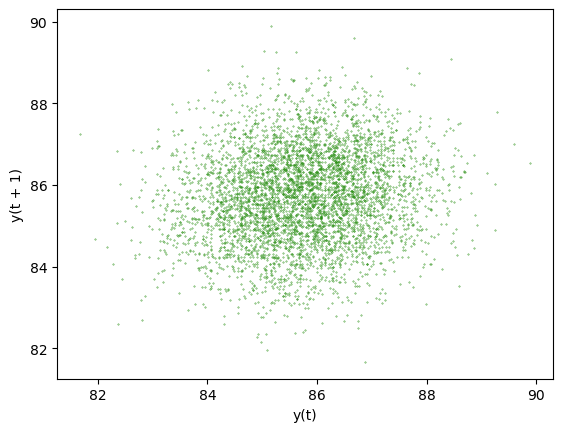

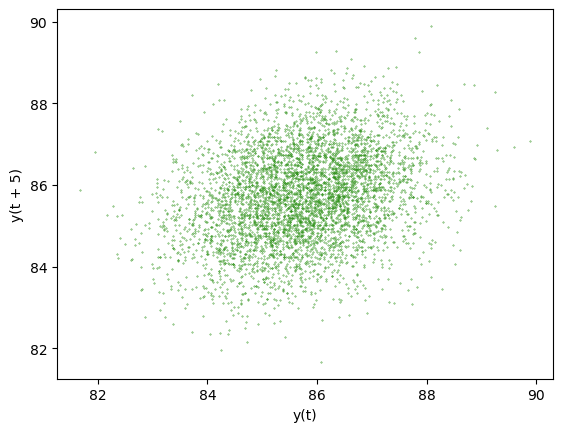

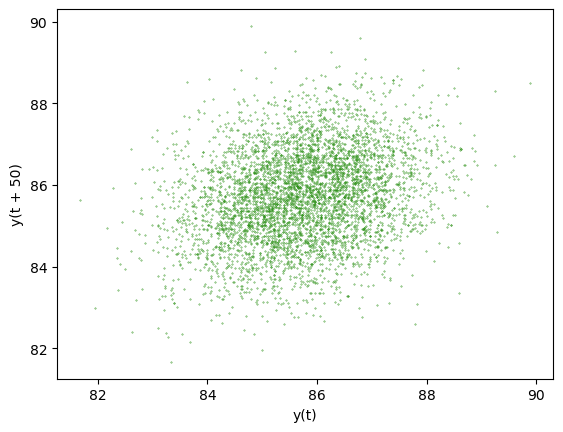

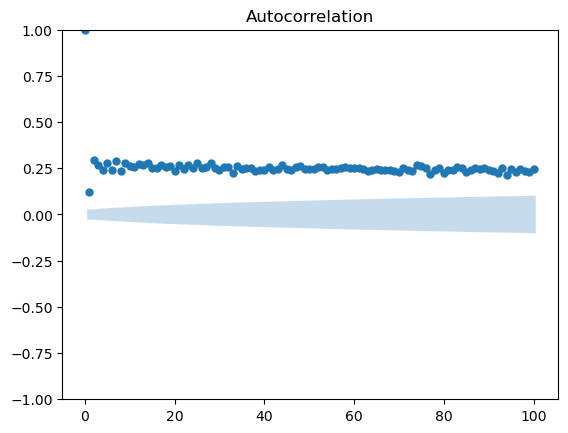

In [13]:
from statsmodels.graphics.tsaplots import plot_acf

rho_c_around_cc = cc['rho_c'][np.abs(cc['time'] - 12500) < 500]

pd.plotting.lag_plot(rho_c_around_cc, lag=1, s = 0.1, c = "#288E12")
plt.show()
pd.plotting.lag_plot(rho_c_around_cc, lag=5, s = 0.1, c = "#288E12") #1 dynamical time lag
plt.show()
pd.plotting.lag_plot(rho_c_around_cc, lag=50, s = 0.1, c = "#288E12") #10 dynamical time lag
plt.show()

_ = plot_acf(rho_c_around_cc, lags = 100, use_vlines=False)


I am not sure what we learned from this. 

Anyway, let's check the other quantities.

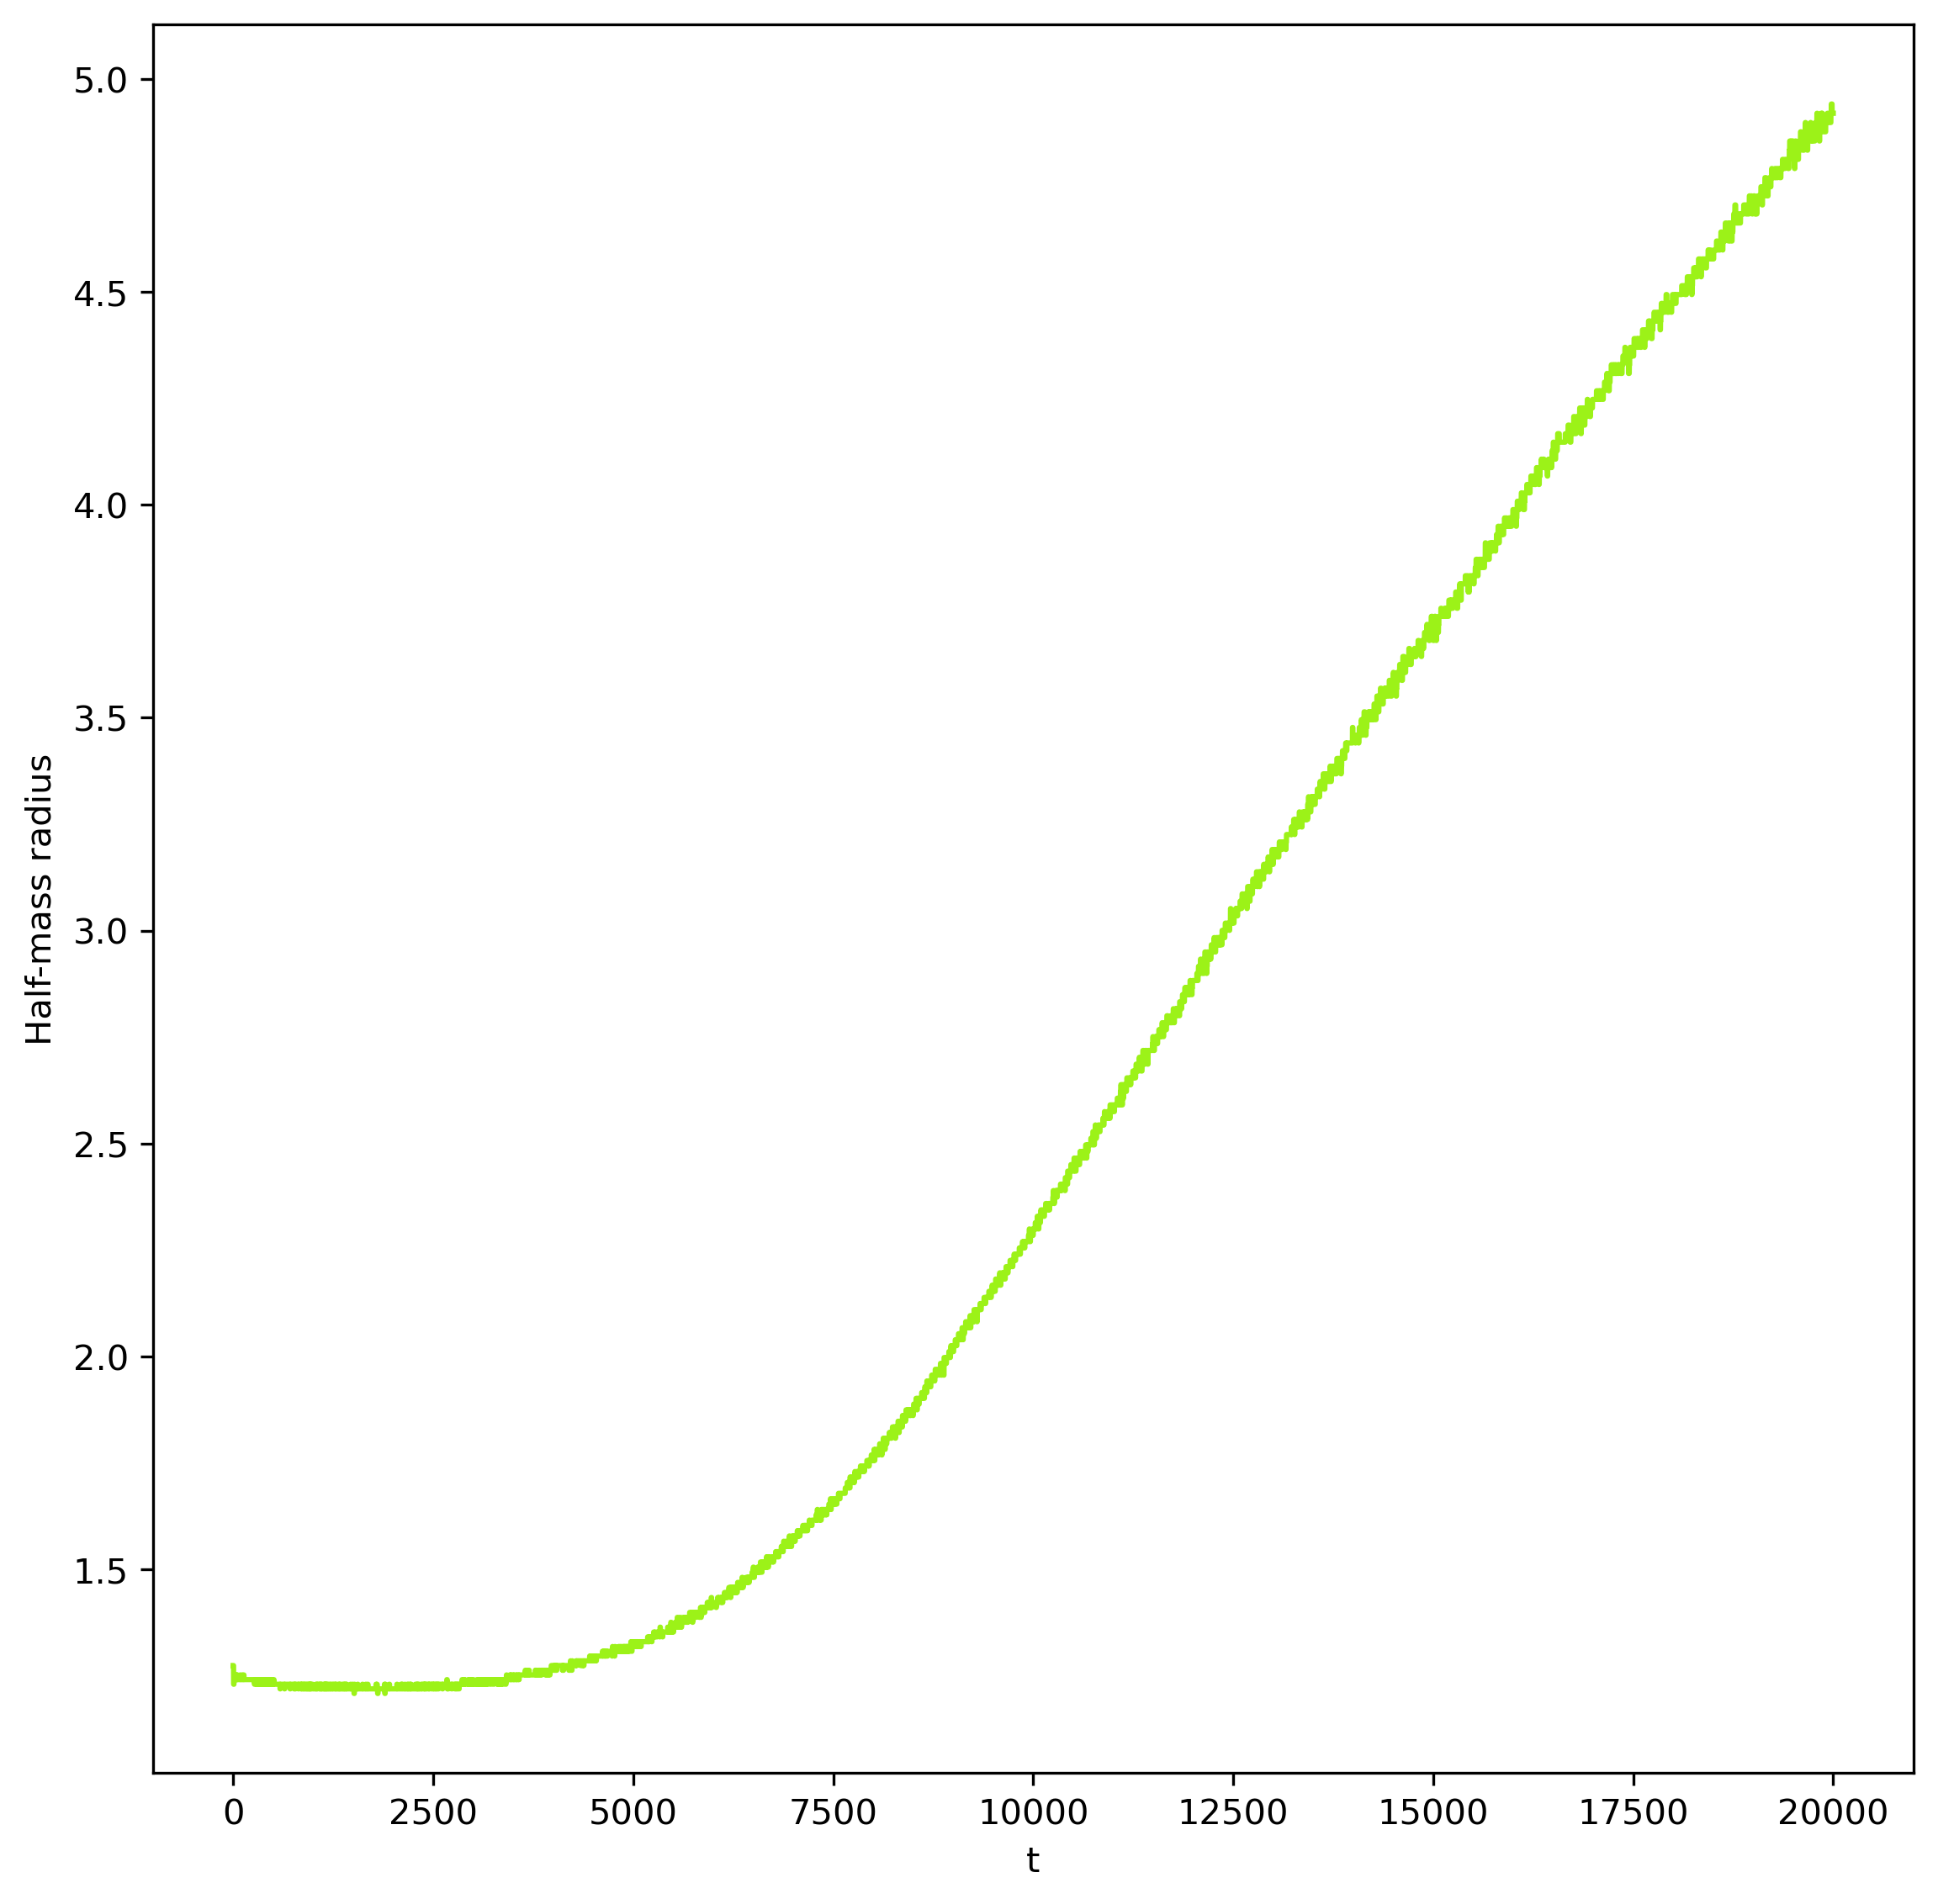

In [14]:
plt.figure(figsize=(9, 9), dpi=300)
plt.plot(cc['time'], cc['r_half'], color = '#9CF218')
plt.xlabel('t')
plt.ylabel('Half-mass radius')
plt.show()

It is known from theory that in an isolated cluster the half mass radius will increase monotonically. This looks pretty good.

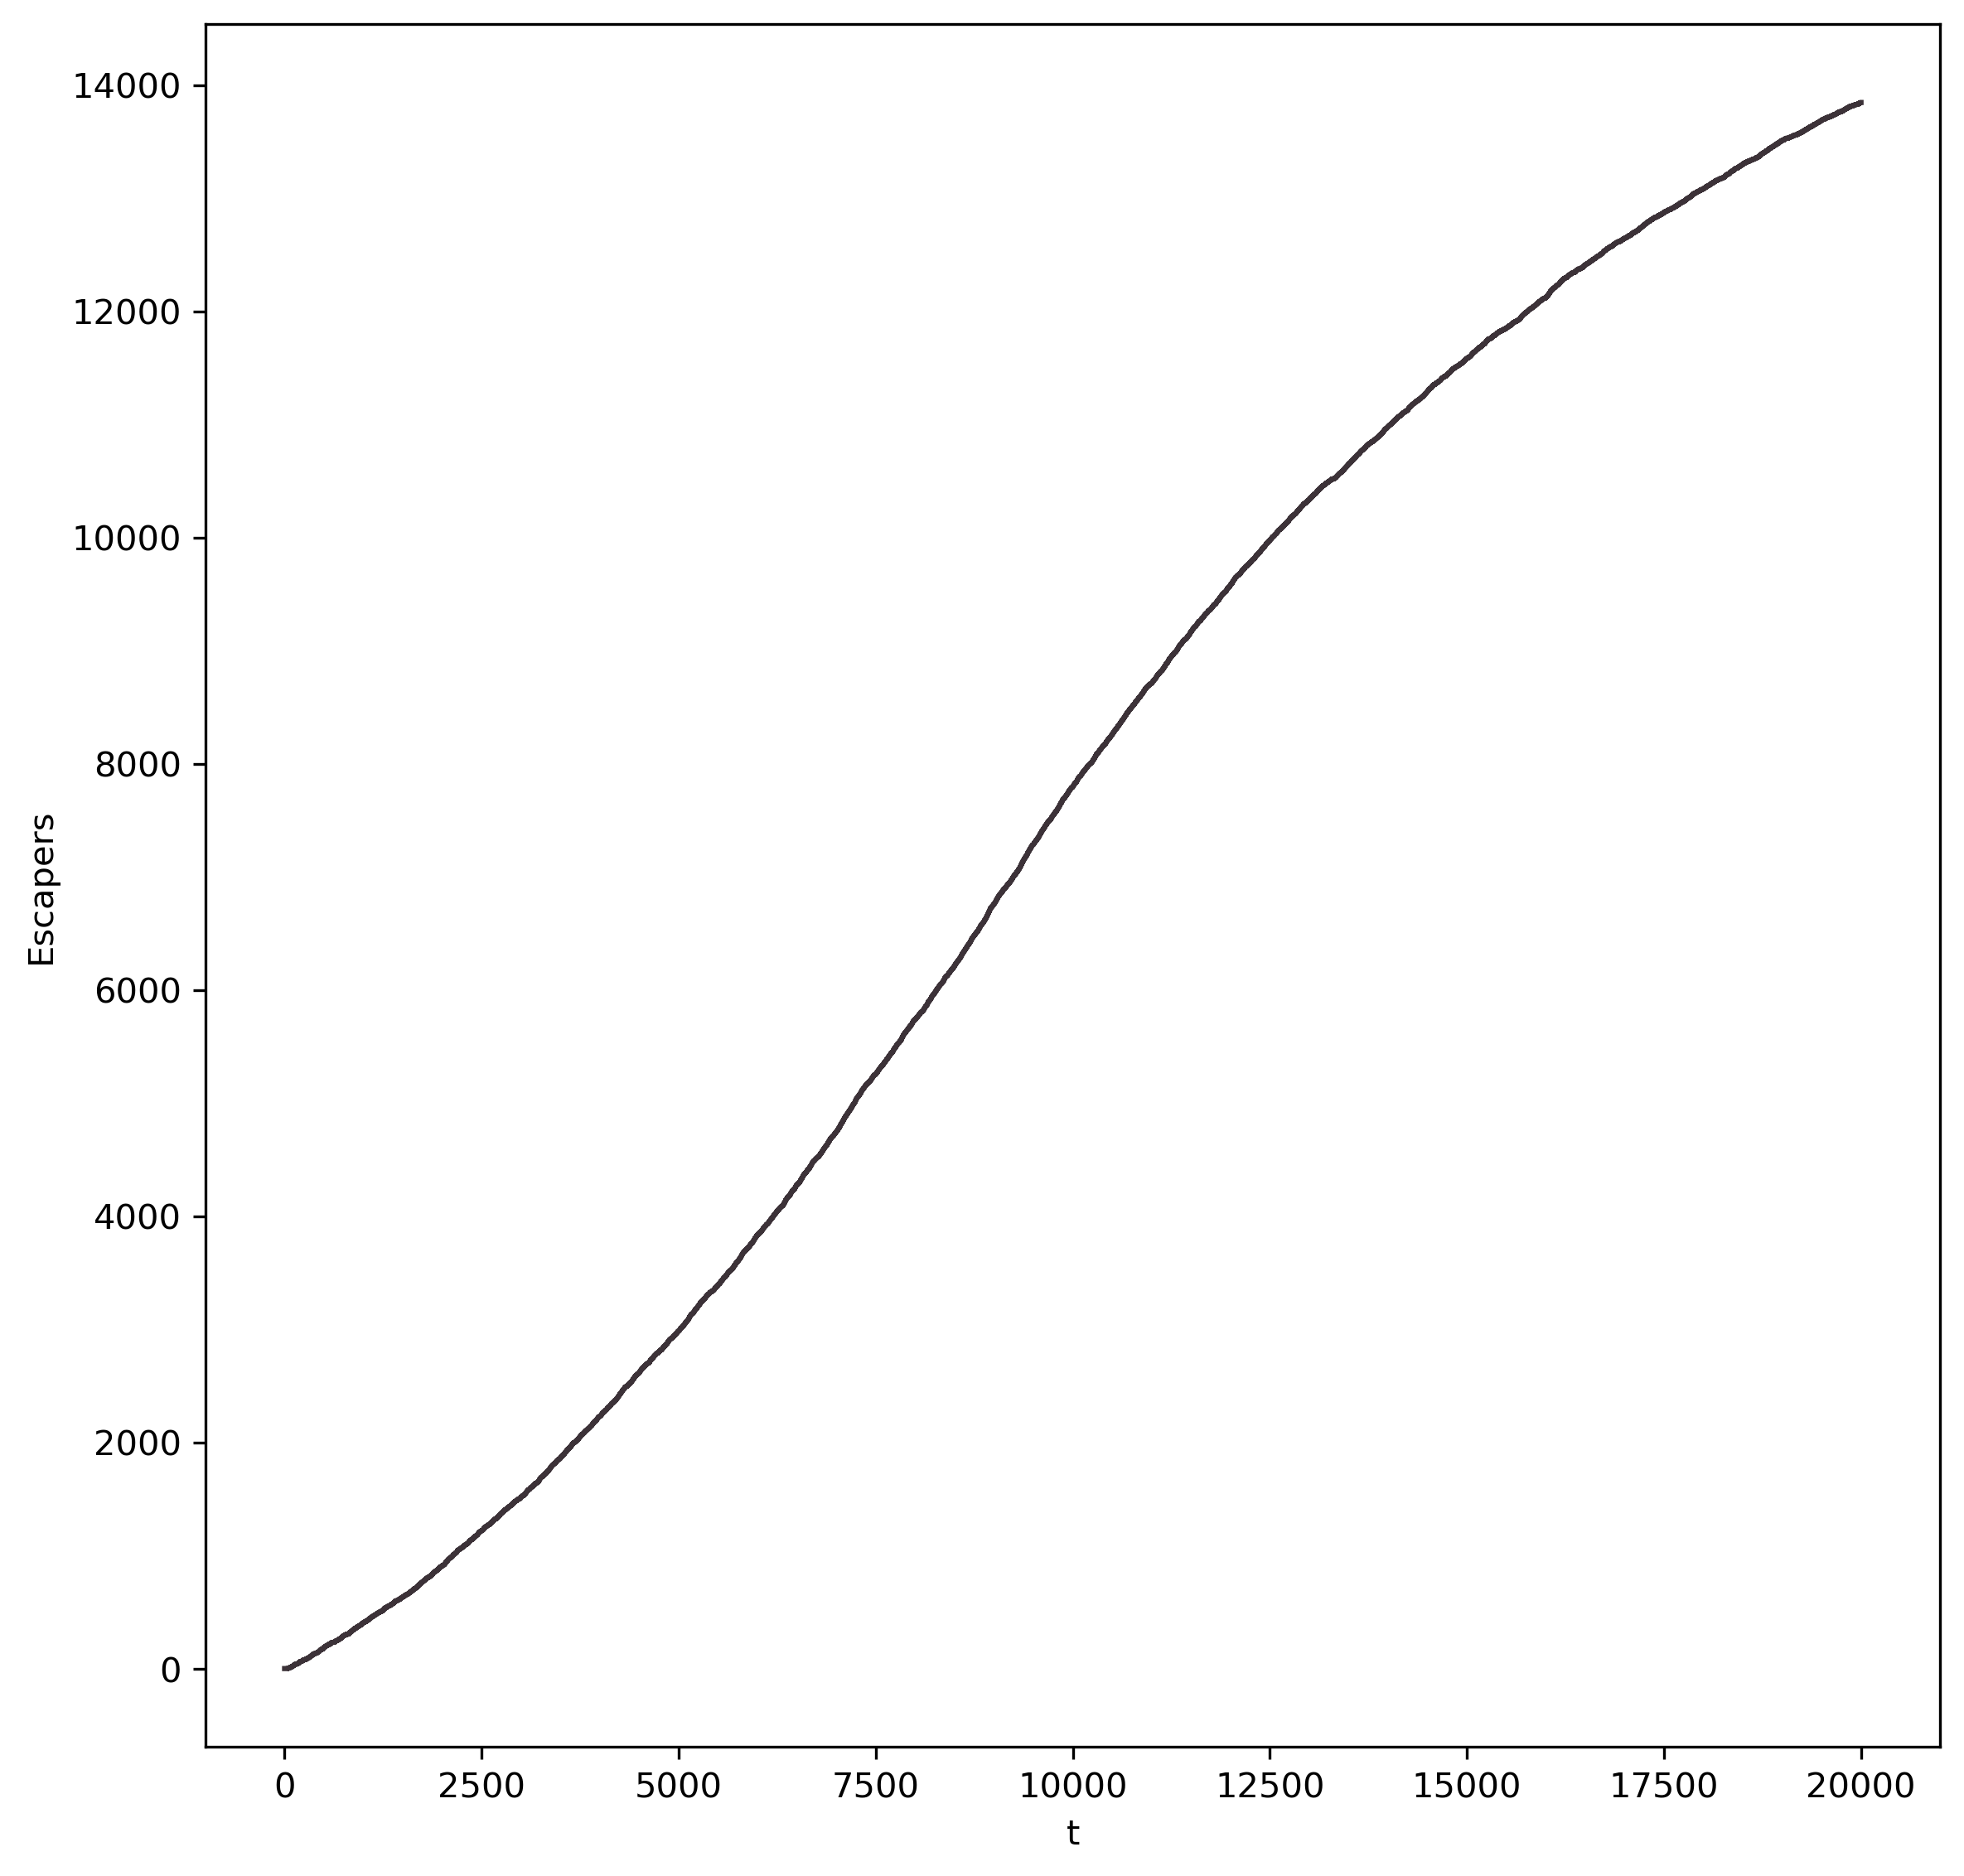

In [15]:
plt.figure(figsize=(9, 9), dpi=300)
plt.plot(cc['time'], cc['N_esc'], color = '#3C3238')
plt.xlabel('t')
plt.ylabel('Escapers')
plt.show()

The total cumulative number of escapers also increases, as it should. 